<a href="https://colab.research.google.com/github/paradisepilot/study/blob/master/machine-learning/deep-learning/cnn/mnist/Dwivedi_2022_07_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source: https://neptune.ai/blog/how-to-use-google-colab-for-deep-learning-complete-tutorial

In [1]:
#import necessary libraries
import tensorflow as tf

#load training data and split into train and test sets
mnist = tf.keras.datasets.mnist
 
(x_train,y_train), (x_test,y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11501568/11490434 [==============================] - 0s 0us/step


In [2]:
#define model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

#define loss function variable
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

#define optimizer,loss function and evaluation metric
model.compile(
    optimizer='adam',
    loss=loss_fn,
    metrics=['accuracy']
)


In [3]:
#train the model
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2986 - accuracy: 0.9128
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1429 - accuracy: 0.9584
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1104 - accuracy: 0.9669
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0884 - accuracy: 0.9734
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0759 - accuracy: 0.9762


In [4]:
#test model accuracy on test set
model.evaluate(x_test,y_test,verbose=2)

313/313 - 1s - loss: 0.0747 - accuracy: 0.9774 - 545ms/epoch - 2ms/step


[0.07467051595449448, 0.977400004863739]

In [5]:
#extend the base model to predict softmax output
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [27]:
print('type(x_test): ' + str(type(x_test)))
print('x_test.shape: ' + str(x_test.shape))
print('type(x_test[1,:,:]): ' + str(type(x_test[1,:,:])))
print('x_test[[0,1],:,:].shape: ' + str(x_test[[0,1],:,:].shape))

type(x_test): <class 'numpy.ndarray'>
x_test.shape: (10000, 28, 28)
type(x_test[1,:,:]): <class 'numpy.ndarray'>
x_test[[0,1],:,:].shape: (2, 28, 28)


In [29]:
probability_model.predict(x_test[[0],:,:])

array([[3.2752187e-06, 4.1642907e-09, 2.3128090e-05, 7.2652918e-05,
        4.2547515e-12, 4.6998295e-07, 7.3237562e-12, 9.9989188e-01,
        6.1470878e-06, 2.3093212e-06]], dtype=float32)

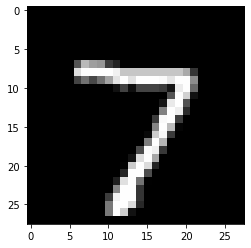

In [30]:
import matplotlib.pyplot as plt
plt.imshow(x_test[0,:,:], cmap=plt.get_cmap('gray'))